In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [134]:
file_path = "IRIS.csv"
iris_df = pd.read_csv(file_path)

iris_df.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,0.2,Iris-setosa
1,NaN,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [135]:
stats = iris_df.describe()
print(stats)

       sepal_length  sepal_width  petal_length  petal_width
count    148.000000   148.000000    148.000000   150.000000
mean       5.879054     3.049324      3.773649     1.198667
std        0.890406     0.434483      1.765596     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max       10.000000     4.400000      6.900000     2.500000


In [136]:
null_values = iris_df.isnull().sum().sum()
duplicates = iris_df.duplicated().sum()
samples = iris_df.shape[0]

print(null_values, duplicates, samples)

6 3 150


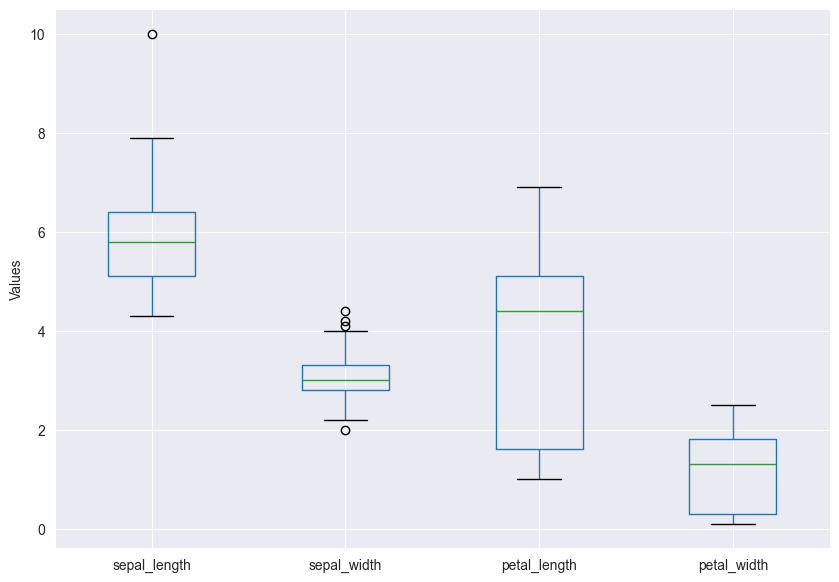

In [137]:
iris_df.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'],figsize=(10,7))
plt.ylabel("Values")
plt.show()

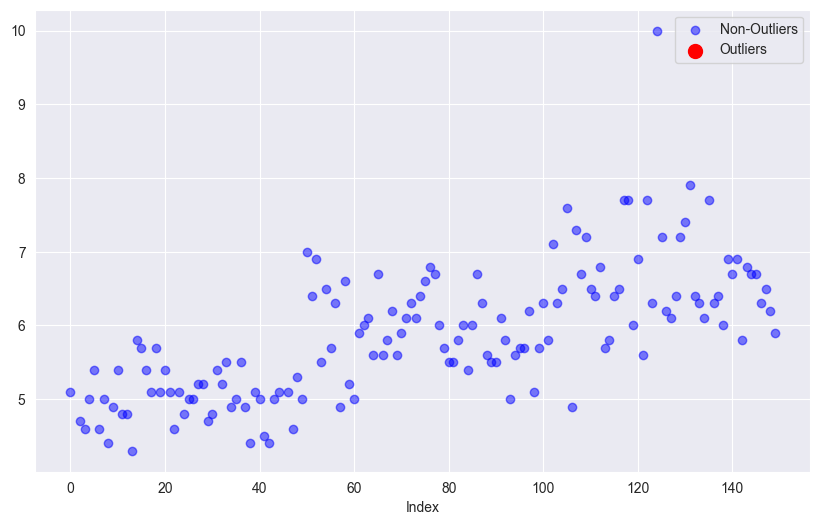

In [138]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | df[column] > upper_bound]

column = 'sepal_length'
outliers =  detect_outliers(iris_df, column)
plt.figure(figsize=(10,6))

plt.scatter(iris_df.index, iris_df[column], color='blue', label='Non-Outliers', alpha=0.5)
plt.scatter(outliers.index, outliers[column], color='red', label='Outliers', s=100)

plt.xlabel("Index")
plt.legend()
plt.show()

In [139]:
iris_df_cleaned = iris_df.dropna()
iris_df_cleaned = iris_df_cleaned.drop_duplicates()

null_values = iris_df_cleaned[column].isnull().sum().sum()
duplicates = iris_df_cleaned.duplicated().sum()
samples = iris_df_cleaned.shape[0]

print(null_values, duplicates, samples)
iris_df_cleaned.head()

0 0 141


,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [140]:
one_hot_encoded = pd.get_dummies(iris_df_cleaned['species'])

iris_df_cleaned_species_one_hot = pd.concat([iris_df_cleaned.drop(columns="species"), one_hot_encoded.astype(int)], axis = 1)
# iris_df_cleaned = pd.concat([iris_df_cleaned.drop(columns=['species']), one_hot_encoded.astype(int)], axis = 1)

iris_df_cleaned_species_one_hot.head(50)

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0
10,5.4,3.7,1.5,0.2,1,0,0
11,4.8,3.4,1.6,0.2,1,0,0


In [141]:
label_encoder = LabelEncoder()
iris_df_cleaned['species'] = label_encoder.fit_transform(iris_df_cleaned['species'])
iris_df_cleaned.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0


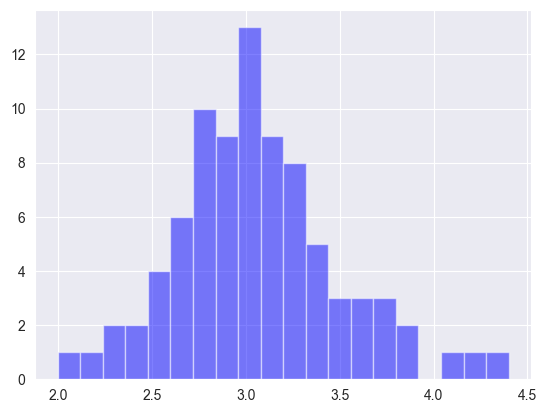

((84, 4), (84,), (28, 4), (28,), (29, 4), (29,))

In [142]:
X = iris_df_cleaned.drop(columns=['species'])
Y = iris_df_cleaned['species']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp , Y_temp, test_size = 0.5, random_state=42)

# plt.figure(figsize=(10,6))

plt.hist(X_train['sepal_width'], bins = 20, color = 'blue', alpha = 0.5)
plt.show()

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

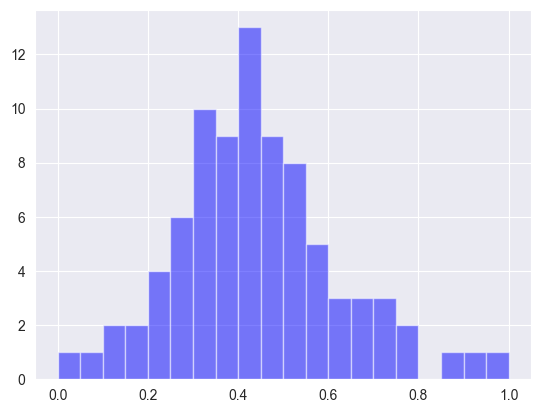

In [150]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train)
plt.hist(X_train_df[1], bins = 20, color = 'blue', alpha = 0.5)
plt.show()

model accuracy: 0.9655172413793104


<Figure size 1000x600 with 0 Axes>

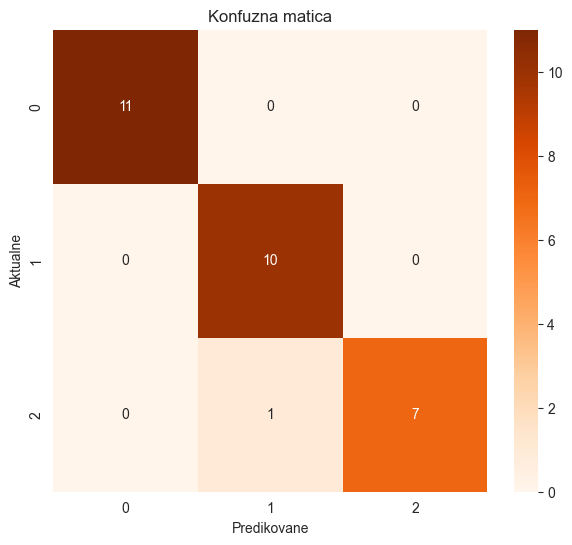

In [144]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accurracy = accuracy_score(Y_test, y_pred)
print(f"model accuracy: {accurracy}")

conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Konfuzna matica")
plt.xlabel("Predikovane")
plt.ylabel("Aktualne")
plt.show()

In [145]:
# knn = KNeighborsClassifier(n_neighbors=5)
# ...Dalej sme nerobili..